In [1]:
import numpy as np
import Derivatives as Div
import Cheb as Ch
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz

class Parent:
    x = None

class Child1(Parent):
    def __init__(self) -> None:
        self.x = [1, 2]

parent = Parent()
child = Child1()

print(parent.x)
print(child.x)
print(Parent.x)
print(Child1.x)

None
[1, 2]
None
None


Size of x:  30
Shape of D:  (30, 30)


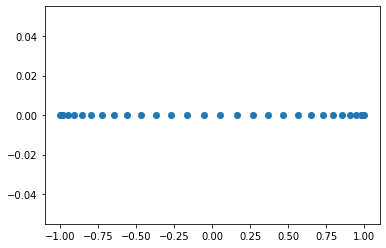

In [2]:
N = 30          
x = Ch.Grid(N, mode='cheb').grid
D = Div.DR(N).matrix

print("Size of x: ", len(x))
print("Shape of D: ", D.shape)

plt.scatter(x, [0 for i in range(N)])
plt.show()

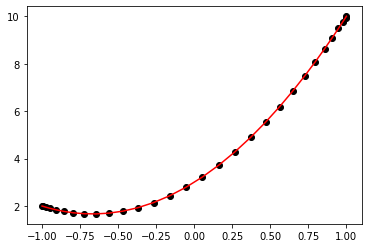

In [3]:
def poly3(x, a, b, c, d):
    return a*x*x*x + b*x*x + c*x + d

def poly3div(x, a, b, c, d):
    return 3*a*x*x + 2*b*x + c


a, b, c, d = 1, 2, 3, 4

ydata = [poly3(i, a, b, c, d) for i in x]   # 3rd degree polynomial values
yRef = [poly3div(i, a, b, c, d) for i in x] # true derivative
yD = D @ ydata                              # spectral derivative


plt.plot(x, yRef, 'r')
plt.scatter(x, yD, c='black')
plt.show()

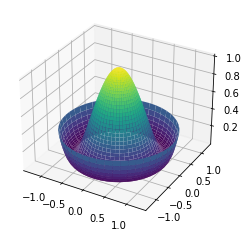

In [4]:
r = np.linspace(0, 1, 20)
t = np.linspace(0, 0.5, 20)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(0, 1.25, 50)
p = np.linspace(0, 2*np.pi, 50)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap="viridis")
plt.show()


In [5]:
dx = Div.DR(5)

print(dx)
print()

[[ 5.5    -6.8284  2.     -1.1716  0.5   ]
 [ 1.7071 -0.7071 -1.4142  0.7071 -0.2929]
 [-0.5     1.4142  0.     -1.4142  0.5   ]
 [ 0.2929 -0.7071  1.4142  0.7071 -1.7071]
 [-0.5     1.1716 -2.      6.8284 -5.5   ]]



In [6]:
N = 4
interval_length = 2*np.pi

h = interval_length / N
arr = ((-1)**np.arange(1, N))
col = 0.5 * arr / np.tan(np.arange(1, N) * h/2)
col = np.insert(col, 0, 0)
# print(col)

matrix = toeplitz(col)
for i in range(N):
    for j in range(i, N):
        matrix[i, j] = -1*matrix[j, i]

print(matrix)

[[-0.000000e+00  5.000000e-01 -3.061617e-17 -5.000000e-01]
 [-5.000000e-01 -0.000000e+00  5.000000e-01 -3.061617e-17]
 [ 3.061617e-17 -5.000000e-01 -0.000000e+00  5.000000e-01]
 [ 5.000000e-01  3.061617e-17 -5.000000e-01 -0.000000e+00]]


[[ -0.          19.99583316  -9.99166528 ...   0.37679623  -0.35755594
    0.33899165]
 [-19.99583316  -0.          19.99583316 ...  -0.39677557   0.37679623
   -0.35755594]
 [  9.99166528 -19.99583316  -0.         ...   0.41756386  -0.39677557
    0.37679623]
 ...
 [ -0.37679623   0.39677557  -0.41756386 ...  -0.          19.99583316
   -9.99166528]
 [  0.35755594  -0.37679623   0.39677557 ... -19.99583316  -0.
   19.99583316]
 [ -0.33899165   0.35755594  -0.37679623 ...   9.99166528 -19.99583316
   -0.        ]]


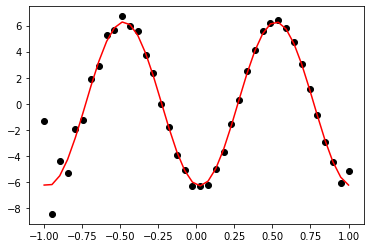

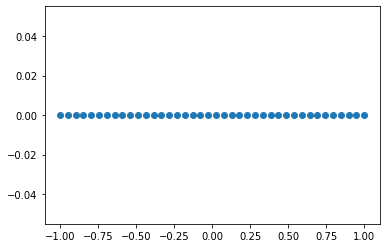

In [7]:
def sin(x, a, b, c, d):
    return a * np.sin(b*np.pi*x + c)

def sinDiv(x, a, b, c, d):
    return a*b*np.pi * np.cos(b*np.pi*x + c)

N = 40
x = Ch.Grid(N, mode='uni').grid
D = Div.DTheta(N, interval_length=2).matrix
# x = Ch.Grid(N, mode='cheb').grid
# D = Div.DR(N).matrix

print(D)
a, b, c, d = 1, 2, 3, 4

ydata = [sin(i, a, b, c, d) for i in x]   # 3rd degree polynomial values
yRef = [sinDiv(i, a, b, c, d) for i in x] # true derivative
yD = D @ ydata                              # spectral derivative


plt.plot(x, yRef, 'r')
plt.scatter(x, yD, c='black')
plt.show()

plt.scatter(x, [0 for i in range(N)])
plt.show()